<p align="center">
    <img src="./img/image-1.png">
<p>

# Cómo se mide el éxito en videojuegos

La industria de los videojuegos se ha convertido en los ultimos 10 años, en uno de los sectores con mayor recaudación del mundo, más que el cine y la música juntos. Estamos hablando de un sector que generó en el 2023 alrededor de $184.0 billones de dolares.

Sin embargo, uno de los puntos que el público general puede no tomar en cuenta son los costes generales de desarrollo. Para hacernos una idea de esto, a comienzos de la sexta generación de consolas (Xbox, PS2 y GameCube) los costes de desarrollo rondaban entre los $2-$7 millones de dolares para juegos medianos, y entre $15-$60 millones para juegos AAA. el abánico es bastante amplio, pero esto dependía de cuan ambiciosos fuesen los estudios y publishers en sus lanzamientos, años de desarrollo, marketing, licencias si eran multiplataforma, etc. Hoy, en la novena generación de consolas, los costes de desarrollo comprenden rangos muy elevados: desde $20-$50 millones de dolares para juegos medianos, y desde $60-$600 millones de dolares para juegos AAA. Este rango tan disperso comprenden juegos de todo tipo, así como grandes y nuevas IPs: Final Fantasy XVI ($60 millones, 87 MC, 2023), GTA 5 ($500 millones, 97 MC, 2013), Star Citizen ($600 millones, en Acceso anticipado).

<sup>[Aquí puedes ver la lista de los juegos más caros de la historia](https://en.wikipedia.org/wiki/List_of_most_expensive_video_games_to_develop)</sup>

El problema de todo esto vienen siendo los beneficios que se esperan de estos juegos. Aunque hay mucho caso de exito, hay otros los cuales no han corrido la misma suerte: SONY lanzó en el mes de agosto Concord (62 MC), un juego multijugador de 5V5 que se estima costó $400 millones, vendiendo 25000 unidades y una media de 700 jugadores, [muy lejos de cubrir un porcentaje minúsculo del desarrollo y siendo un absoluto fracaso,](https://jonahwrites.blog/2024/09/05/concord-the-biggest-flop-in-gaming-history/) tanto que cerraron los servidores pasadas dos semanas de su lanzamiento y devolviendo el dinero a los jugadores. 

Tambien estamos hablando de un caso muy evidente pero, ¿y si te dijera que incluso juegos muy bien valorados tampoco se salvan? Alan Wake 2 (89 MC) tuvó un coste de desarrollo de $70 millones de dolares y siendo muy bien recibido por la comunidad y critica. Sin embargo, [vendió 1.3m según un reporte de Remedy en febrero de 2024,](https://www.eurogamer.net/alan-wake-2-fastest-selling-remedy-game-but-yet-to-turn-a-profit) lo cual no llega a cubrir los costes de desarrollo.

¿Tiene algo que ver el género o la nota recibida? ¿Quizá sea un tema de timing? ¿El género más popular suele ser el más rentable? Todas estas dudas y más las estaremos afrontando a lo largo de este analisis, en el que queremos abarcar estas dudas gracias a los datos.

## Nuestras hipótesis
+ ¿Un videojuego exitoso en cuanto a critica representa el éxito en cuanto a ventas?
+ ¿Importa el género de un videojuego?
+ ¿La fecha de lanzamiento de un videojuego es un elemento clave para máximizar ingresos?
+ ¿Se pueden tener en cuenta otros parámetros para medir el éxito? 

<sup><sub>
*Este análisis toma en cuenta el mercado de consolas de la octava generación y PC para ventas generales:*<br>
[VGChartz](https://www.vgchartz.com) <br>
*Este análisis toma en cuenta el mercado del PC en 2024 **usando datasets de Steam:*** <br>
[Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset) <br>
[2024 Steam Statistics | Python | SQL | Tableau](https://www.kaggle.com/code/johnangelobelarma/2024-steam-statistics-python-sql-tableau/input)
</sub></sup>

## OBTENCIÓN DE LOS DATOS

Lo primero que haremos será la obtención, limpieza y organización de los datos

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import time
#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
sns.set_theme(font="Verdana",rc={
    'axes.facecolor': '#F8F0E4',     # Fondo de los ejes
    'figure.facecolor': '#6D685C',   # Fondo de la figura
    'axes.labelcolor': '#F8F0E4',       # Color de las etiquetas de los ejes
    'axes.titlecolor': '#F8F0E4',        # Color del título
    'xtick.color': '#F8F0E4',          # Color de los ticks del eje x
    'ytick.color': '#F8F0E4',          # Color de los ticks del eje y
    'text.color': '#F8F0E4'           # Color del texto general
})

pd.options.mode.chained_assignment = None  # default='warn'

Realmente el que más trabajo nos llevará limpiar y aprovechar sus columnas será el primer DataFrame (games.csv)

In [4]:
# Pasos para limpiar el dataset original, he creado uno nuevo que pesará menos y poder subirlo a GitHub

#1st CSV
games_df_column_names = ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 
                    'Required age', 'Price', 'Unknown', 'DiscountDLC count', 'About the game', 
                    'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 
                    'Website', 'Support url', 'Support email', 'Windows', 'Mac', 
                    'Linux', 'Metacritic score', 'Metacritic url', 'User score', 
                    'Positive', 'Negative', 'Score rank', 'Achievements', 
                    'Recommendations', 'Notes', 'Average playtime forever', 
                    'Average playtime two weeks', 'Median playtime forever', 
                    'Median playtime two weeks', 'Developers', 'Publishers', 
                    'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']

df_1 = pd.read_csv("./../data/games.csv", header=None, skiprows=1)
df_1.columns = games_df_column_names

columns_todrop = ["Estimated owners", "Peak CCU", "Required age", "Unknown", "About the game", "Supported languages",
                  "Full audio languages", "Reviews", "Header image", "Website", "Support url", "Support email", "Windows", "Mac",
                  "Linux", "Metacritic url", "Positive", "Negative", "Score rank", "Achievements", "Recommendations", "Notes", "Tags",
                  "Screenshots", "Movies", "Average playtime two weeks" ,"Median playtime forever", "Median playtime two weeks",
                  "DiscountDLC count", "User score"]
df_1.drop(columns_todrop, axis=1, inplace=True)

# Inserting new colums
df_1.insert(9, "Category_1", np.nan)
df_1.insert(10, "Category_2", np.nan)
df_1.insert(12, "Genre_1", np.nan)
df_1.insert(13, "Genre_2", np.nan)

# Parsing and resetting index
df_1[["Category_1", "Category_2", "Genre_1", "Genre_2"]] = df_1[["Category_1", "Category_2", "Genre_1", "Genre_2"]].astype(object)
df_1["Categories"] = df_1["Categories"].astype(str)
df_1.reset_index(drop=True, inplace=True)

# Categories split
for i, categories in enumerate(df_1.copy()["Categories"].str.split(",")):
    df_1.iloc[i,9] = categories[0]
    if len(categories) > 1:
        df_1.iloc[i,10] = categories[1]
    else:
        continue

# Date Formatting
for i,date_string in enumerate(df_1["Release date"]):
    date = pd.to_datetime(date_string)
    # Convertir al formato deseado (DD-MM-YYYY)
    formatted_date = date.strftime('%d-%m-%Y')
    df_1.iloc[i,2] =  formatted_date

# Genres split
for i, genres in enumerate(df_1.copy()["Genres"].str.split(",")):
    if df_1.iloc[i,11] is not np.nan:
        df_1.iloc[i,12] = genres[0]
        if len(genres) > 1:
            df_1.iloc[i,13] = genres[1]
    else:
        continue

# Step 4 Specify the file path to save data
csv_file_path = "games-xs.csv"
df_1.to_csv(csv_file_path)

FileNotFoundError: [Errno 2] No such file or directory: './../data/games.csv'

Inicializamos y limpiamos los próximos DataFrames: El DataFrame limpio de games.csv, los 1500 juegos de Steam con mayor recaudación en lo que va de año y un dataset con todos los datos de vgchartz.

In [264]:
df_1 = df_1 = pd.read_csv("./../data/games-xs.csv")
df_1.drop(columns=["Unnamed: 0","Name", "Release date", "Price", "Metacritic score", "Average playtime forever", "Developers",
                   "Publishers"], inplace=True)
#df_1.drop(columns="Unnamed: 0",inplace=True)

In [265]:
# 2nd CSV
df_2 = pd.read_csv("./../data/Steam_2024_bestRevenue_1500.csv")

df_2.rename(columns={"steamId":"AppID", "developers":"Developers", "publishers":"Publishers", 
             "publisherClass":"PublisherClass", "revenue":"Revenue", 
             "price":"Price", "ReleaseDate":"Release date", "name":"Name"}, inplace=True)

games_steam = df_2.merge(df_1, on=["AppID"], how="left")

for index, row in games_steam.iterrows():
    games_steam.at[index, "copiesSold"] = round(row["copiesSold"] / 1000000, 2)

/var/folders/d2/nwybmn31251d4d76_gyl2w740000gn/T/ipykernel_70859/4024014620.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  games_steam.at[index, "copiesSold"] = round(row["copiesSold"] / 1000000, 2)


In [266]:
#3rd CSV
games_charts = pd.read_csv("../data/vgchartz-10_13_2024.csv")
games_charts_pc = games_charts[games_charts["console"] == "PC"]

# Si el score no existe en PC, buscar el score de otra plataforma
for index, row in games_charts_pc.iterrows():
    print(row["title"], row["critic_score"])
    if pd.isna(row["critic_score"]):
        print("si es nan")
        # Si existe un valor de critic_score en el df original, lo cambia por ese
        if games_charts[(games_charts["title"] == row["title"]) & (games_charts["critic_score"].notna())]["critic_score"].shape[0] > 0:
            games_charts_pc.at[index, "critic_score"] = games_charts[(games_charts["title"] == row["title"]) & (games_charts["critic_score"].notna())]["critic_score"].max()
        # Si existe un valor de vg_score en el df original, lo cambia por ese
        elif games_charts[(games_charts["title"] == row["title"]) & (games_charts["vg_score"].notna())]["vg_score"].shape[0] > 0:
            games_charts_pc.at[index, "critic_score"] = games_charts[(games_charts["title"] == row["title"]) & (games_charts["vg_score"].notna())]["critic_score"].max()
        # Si existe un valor de user_score en el df original, lo cambia por ese
        elif games_charts[(games_charts["title"] == row["title"]) & (games_charts["user_score"].notna())]["user_score"].shape[0] > 0:
            games_charts_pc.at[index, "critic_score"] = games_charts[(games_charts["title"] == row["title"]) & (games_charts["user_score"].notna())]["user_score"].max()
        else:
            continue

Grand Theft Auto V nan
si es nan
The Binding of Isaac 8.3
Tomb Raider (2013) 8.8
Dead Island 7.1
7 Days to Die nan
si es nan
Just Cause 2 8.2
Diablo III: Reaper of Souls nan
si es nan
Dying Light nan
si es nan
Dishonored nan
si es nan
Resident Evil 4 8.0
Hitman: Absolution 9.0
The Binding of Isaac: Rebirth nan
si es nan
Hotline Miami 8.8
Batman: Arkham City 9.0
Mafia II 7.6
Batman: Arkham Asylum 9.3
How to Survive 2 nan
si es nan
Chivalry: Medieval Warfare nan
si es nan
Broforce nan
si es nan
Alan Wake nan
si es nan
Mad Max (2013) nan
si es nan
Metal Gear Solid V: The Phantom Pain nan
si es nan
Cuphead nan
si es nan
Mark of the Ninja 9.3
Hitman nan
si es nan
How to Survive nan
si es nan
American McGee's Alice nan
si es nan
Batman: Arkham Knight nan
si es nan
Geometry Dash nan
si es nan
Resident Evil 6 nan
si es nan
Thief nan
si es nan
Who's Your Daddy nan
si es nan
The Escapists nan
si es nan
Dead Rising 3: Apocalypse Edition nan
si es nan
Super Hexagon nan
si es nan
Assassin's Creed O

# DESARROLLO

Empecemos entendiendo el mercado general: ¿cúales son los juegos más vendidos?

In [58]:
games_filtered = games_charts[(games_charts["console"].isin(["PS4", "XOne", "PC", "NS"])) & (games_charts["critic_score"].notna()) & (games_charts["total_sales"].notna())]

(4.0, 30.0)

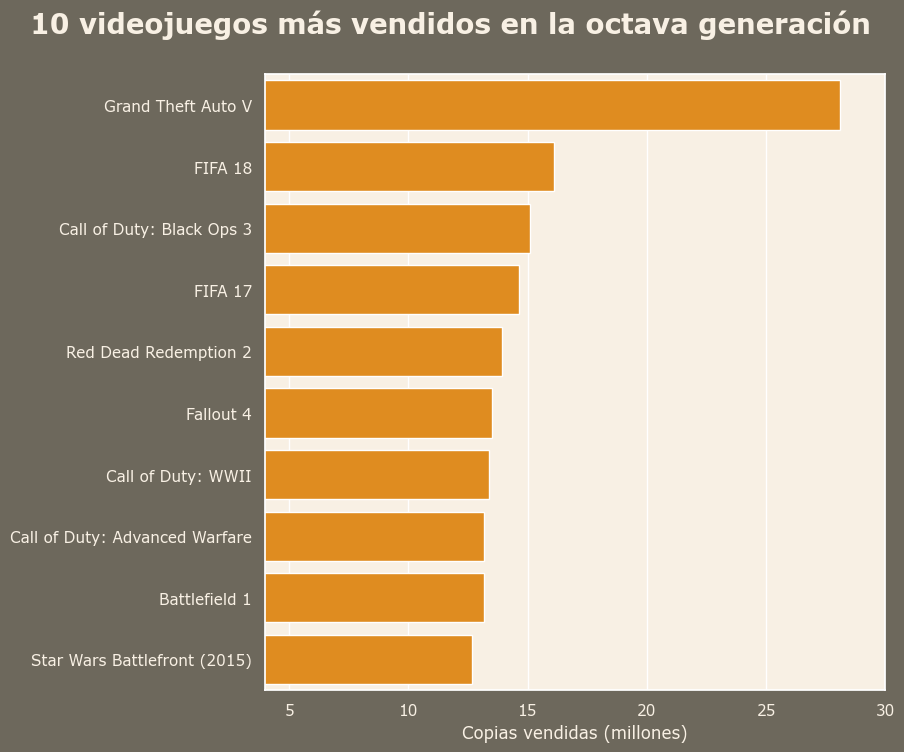

In [238]:
# Top 10 videojuegos más vendidos en las plataformas seleccionadas
total_sales = games_filtered.groupby(["title"])[["total_sales"]].sum().sort_values(by="total_sales", ascending=False).head(10)
plt.figure(figsize=(8,8))

sns.barplot(x="total_sales", y="title", data=total_sales, color="#FF9000")
plt.xlabel("Copias vendidas (millones)")
plt.ylabel("")
plt.title("10 videojuegos más vendidos en la octava generación", loc= "left", x= -0.38,fontsize= 20, weight="bold", pad=30)
plt.xlim(4,30)

## Un videojuego exitoso en cuanto a critica representa el éxito en cuanto a ventas?


In [286]:
reviews_copies = games_steam.groupby(["Name","reviewScore"])[["copiesSold"]].sum().sort_values(by="copiesSold", ascending=False)


<Figure size 1000x600 with 0 Axes>

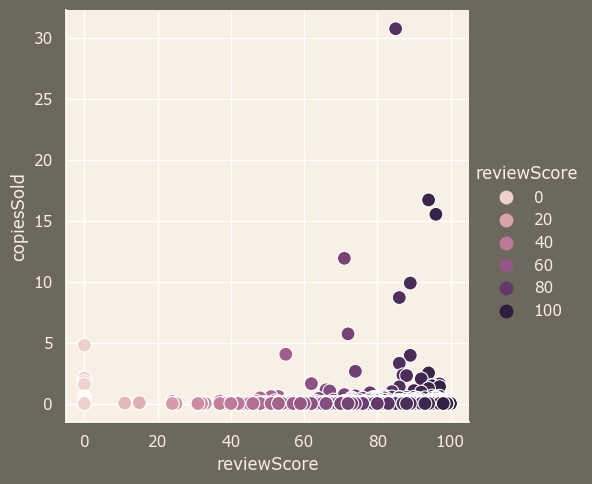

In [291]:
plt.figure(figsize=(10,6))
sns.relplot(data=reviews_copies,x= "reviewScore",
                y="copiesSold", hue="reviewScore",s=100);

/var/folders/d2/nwybmn31251d4d76_gyl2w740000gn/T/ipykernel_70859/665319046.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=reviews_copies, x='reviewScore', y='copiesSold', s=100, palette='deep')


KeyError: 'reviewScore'

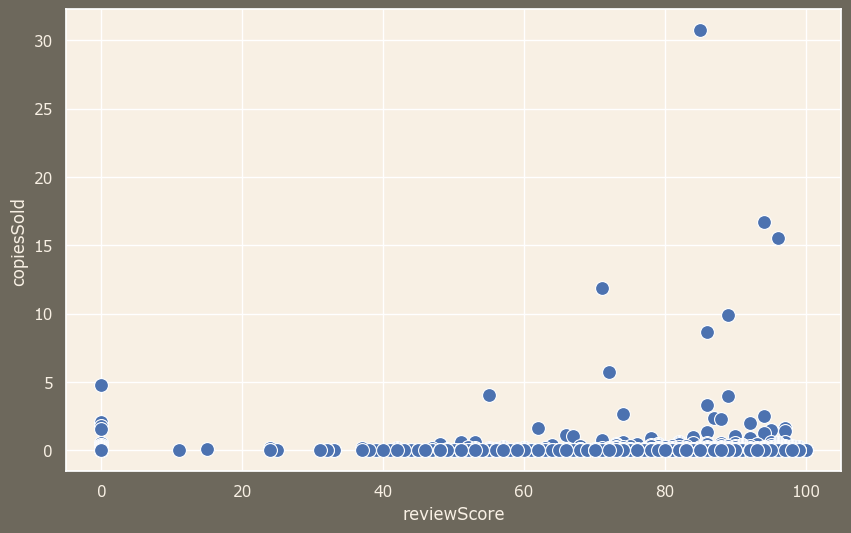

In [293]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data= reviews_copies, x='reviewScore', y='copiesSold', s=100, palette='deep')

# Añadir una línea de tendencia
sns.regplot(data= reviews_copies, x='reviewScore', y='copiesSold', scatter=False, color='black')

# Configurar el título y etiquetas de los ejes
plt.title("Relación entre Notas de Videojuegos y Ventas")
plt.xlabel("Nota del Videojuego")
plt.ylabel("Ventas (en miles)")
plt.grid(True)

# Mostrar el gráfico
plt.show()